## LGM Task 5 - EDA on Terrorism dataset

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/drive/')

Mounted at /drive/


In [3]:
data = pd.read_excel("/drive/MyDrive/small_dataset.xlsx",
header=0,
index_col=False,
keep_default_na=True
)

In [6]:
data = pd.DataFrame(data)

In [7]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaT,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [5]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [9]:

data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [10]:
data.shape

(62090, 18)

In [11]:
data.isnull().sum()

Year              0
Month             0
day               0
Country           0
State           335
Region            0
City              0
latitude       3314
longitude      3315
Attacktype        0
kill           5929
Wound          7817
target1         427
summary       60757
Group             0
Targettype        0
Weapon            0
motive        61041
dtype: int64

In [13]:
data["Wound"] = data["Wound"].fillna(0)
data["kill"] = data["kill"].fillna(0)
data['Casualities'] = data['kill'] + data['Wound']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62090 entries, 0 to 62089
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         62090 non-null  int64  
 1   Month        62090 non-null  int64  
 2   day          62090 non-null  int64  
 3   Country      62090 non-null  object 
 4   State        61755 non-null  object 
 5   Region       62090 non-null  object 
 6   City         62090 non-null  object 
 7   latitude     58776 non-null  float64
 8   longitude    58775 non-null  float64
 9   Attacktype   62090 non-null  object 
 10  kill         62090 non-null  float64
 11  Wound        62090 non-null  float64
 12  target1      61663 non-null  object 
 13  summary      1333 non-null   object 
 14  Group        62090 non-null  object 
 15  Targettype   62090 non-null  object 
 16  Weapon       62090 non-null  object 
 17  motive       1049 non-null   object 
 18  Casualities  62090 non-null  float64
dtypes: f

In [14]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,62090.000000,62090.000000,62090.000000,58776.000000,5.877500e+04,62090.000000,62090.000000,62090.000000
mean,1986.008262,6.396779,15.371622,17.880516,-1.481191e+03,1.866613,1.712095,3.578708
std,6.061949,3.411152,8.802588,24.694567,3.555002e+05,9.093241,25.098620,27.459301
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1982.000000,3.000000,8.000000,4.807579,-7.613663e+01,0.000000,0.000000,0.000000
50%,1987.000000,6.000000,15.000000,14.702080,-5.956210e+00,0.000000,0.000000,0.000000
75%,1991.000000,9.000000,23.000000,38.345210,3.435260e+01,1.000000,0.000000,2.000000
max,1996.000000,12.000000,31.000000,64.837778,1.784419e+02,1180.000000,5500.000000,5513.000000


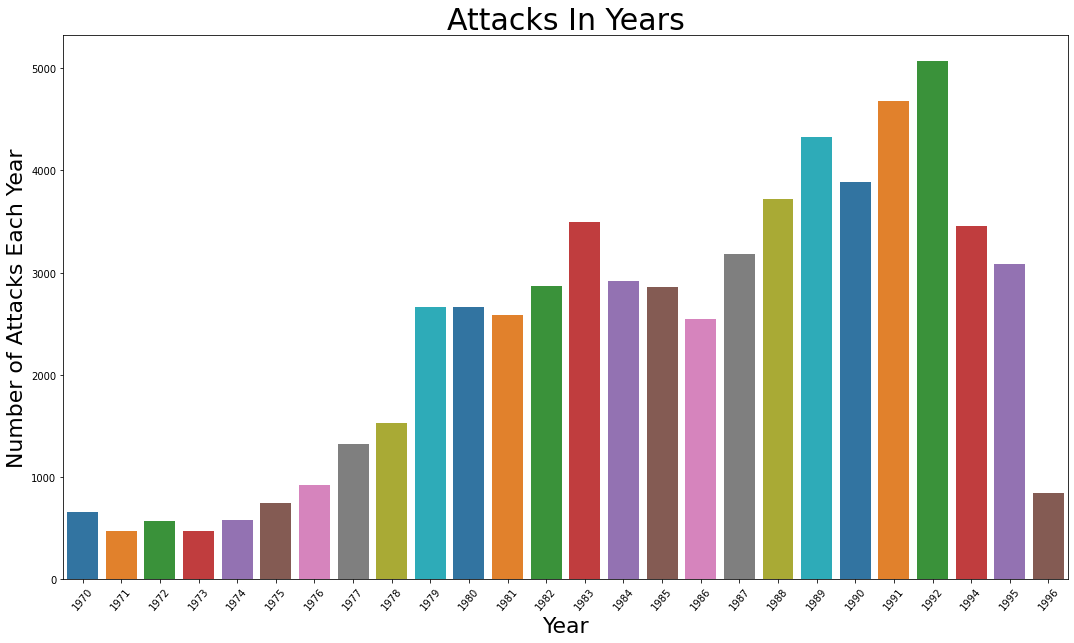

In [15]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year, y = years_count, palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Year',fontsize=22)
plt.ylabel('Number of Attacks Each Year',fontsize=22)
plt.title('Attacks In Years',fontsize=30)
plt.show()

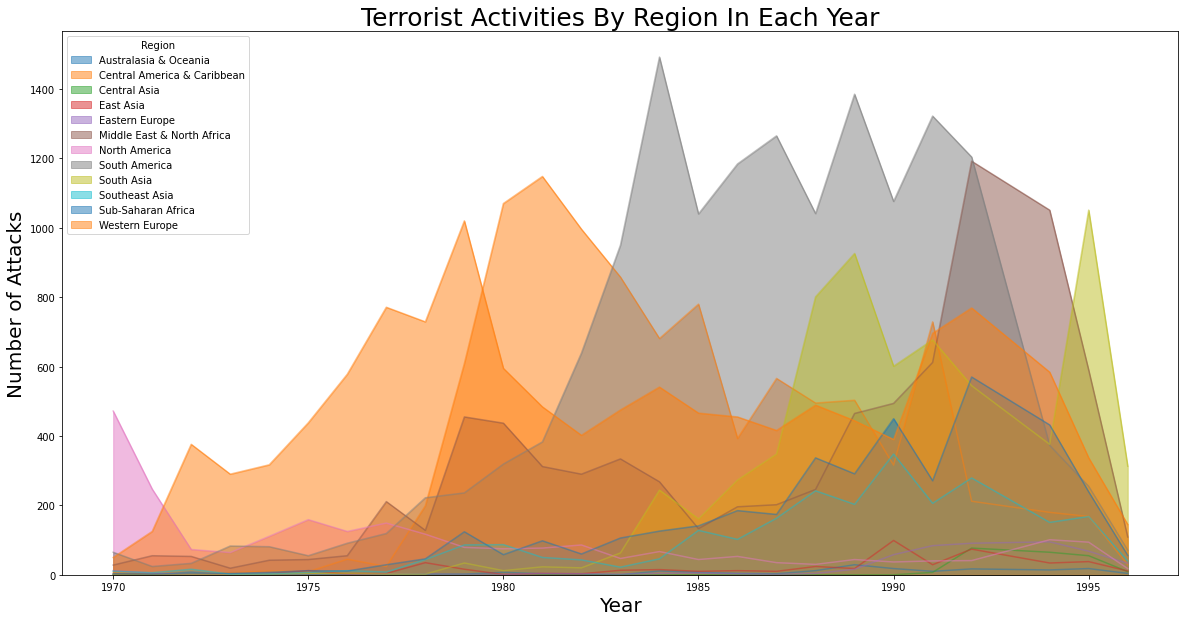

In [16]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [17]:
attack = data.Country.value_counts()[:10]
print(attack)

Peru              5920
El Salvador       5311
Colombia          5041
United Kingdom    3930
Spain             2624
India             2498
Turkey            2268
Chile             2252
United States     2210
Guatemala         1993
Name: Country, dtype: int64


In [18]:
data.Group.value_counts()[1:10]

Shining Path (SL)                                   4445
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2611
Basque Fatherland and Freedom (ETA)                 1699
Palestinians                                        1094
Kurdistan Workers' Party (PKK)                       990
New People's Army (NPA)                              967
Revolutionary Armed Forces of Colombia (FARC)        946
National Liberation Army of Colombia (ELN)           906
Name: Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


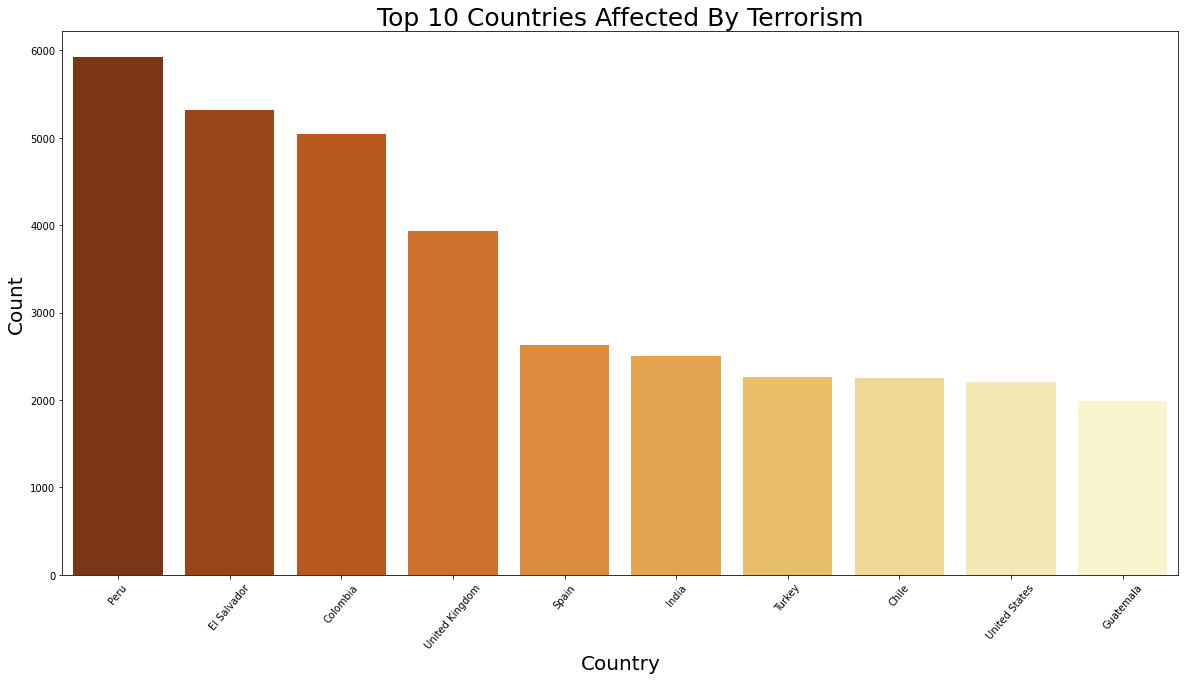

In [19]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top 10 Countries Affected By Terrorism', fontsize=25)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation = 50)
plt.show()

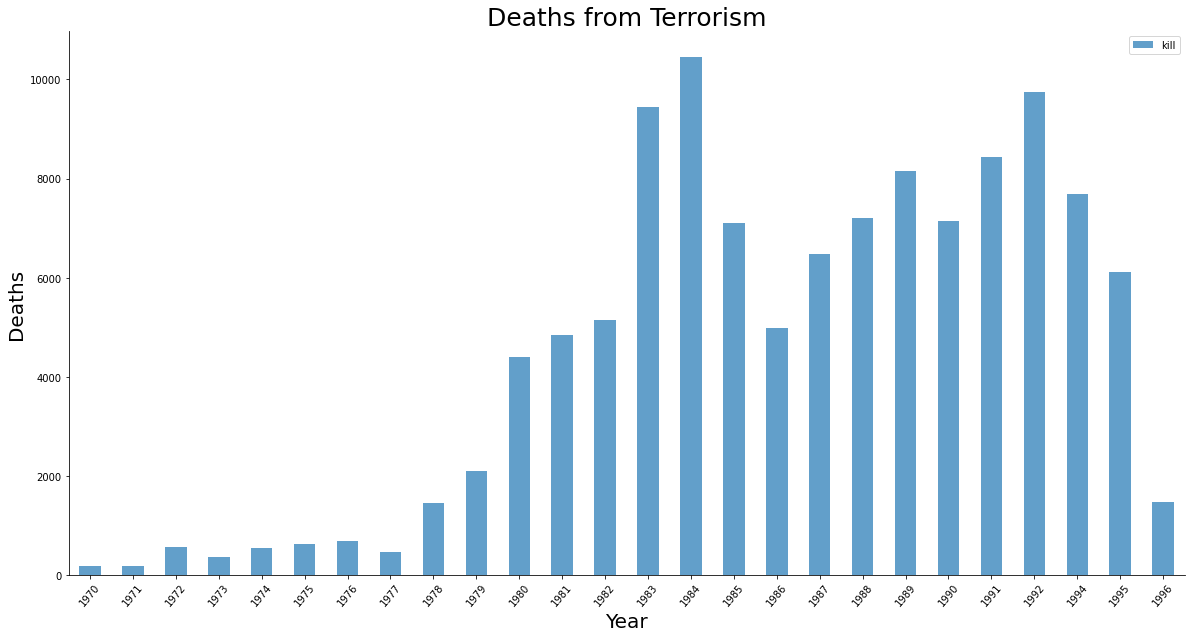

In [20]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("Deaths from Terrorism",fontsize=25)
plt.ylabel("Deaths",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

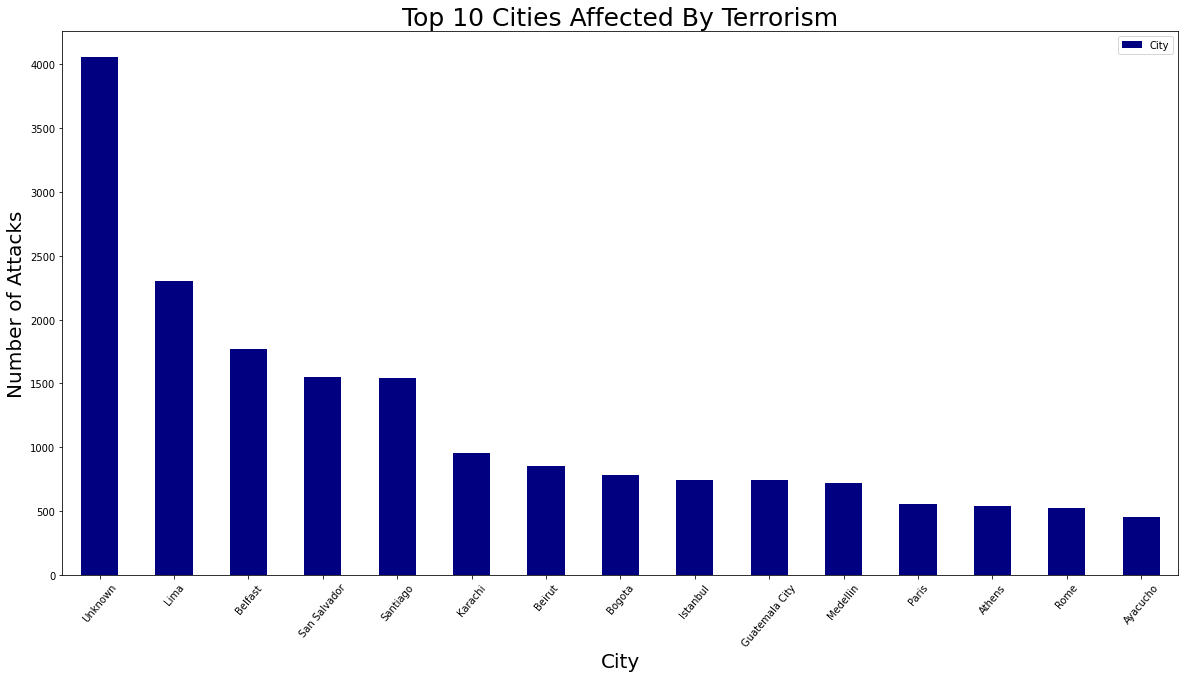

In [21]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(15).plot(kind='bar',figsize=(20,10),color='navy')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.title("Top 10 Cities Affected By Terrorism",fontsize=25)
plt.show()

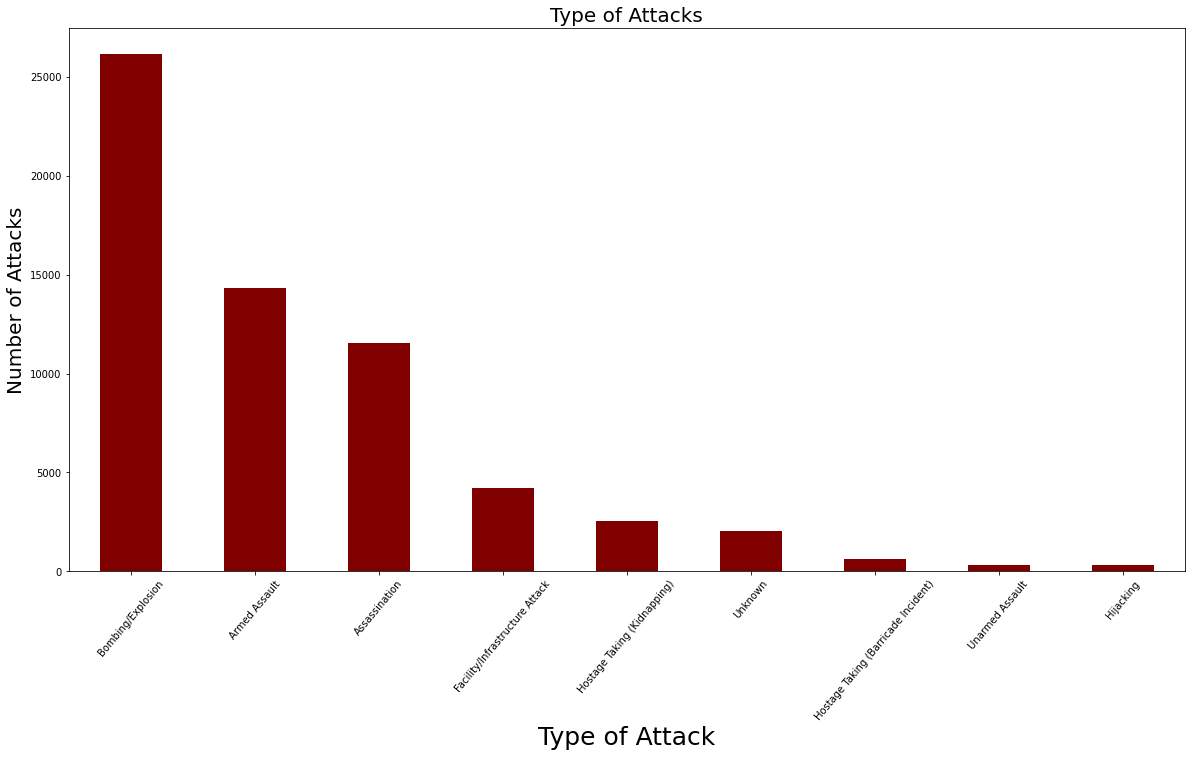

In [22]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='maroon')
plt.xticks(rotation = 50)
plt.xlabel("Type of Attack",fontsize=25)
plt.ylabel("Number of Attacks",fontsize=20)
plt.title("Type of Attacks",fontsize=20)
plt.show()

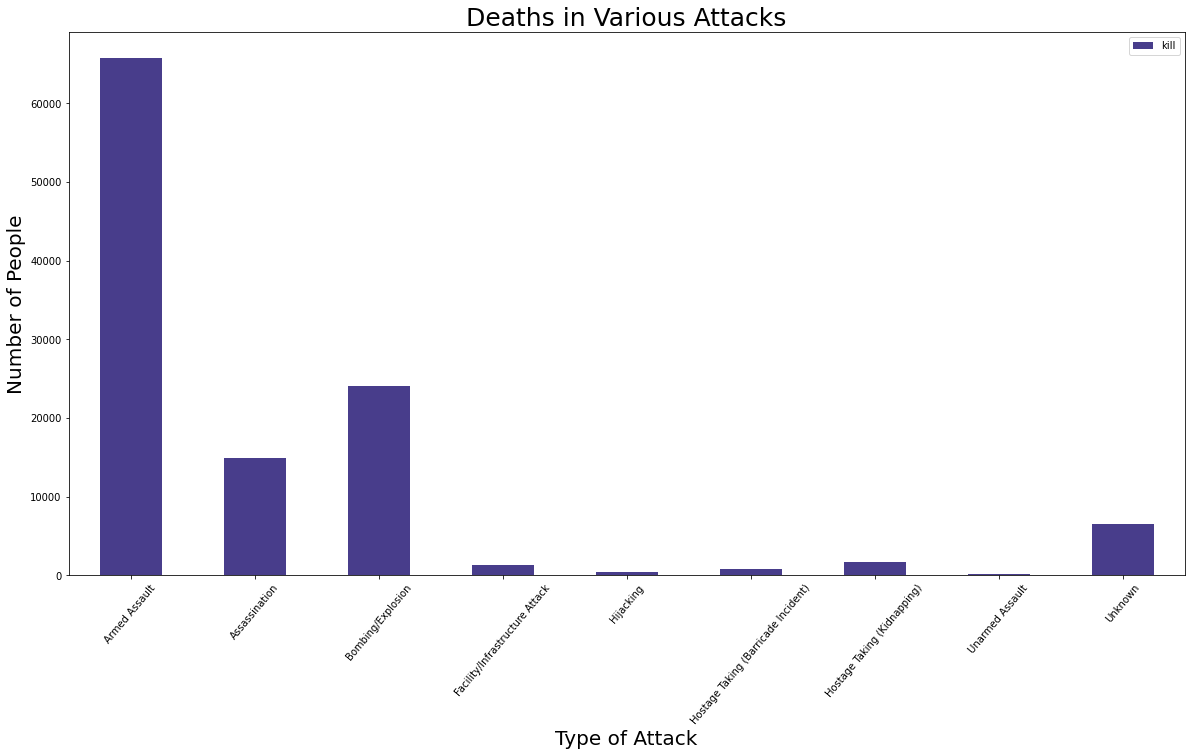

In [24]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Deaths in Various Attacks",fontsize=25)
plt.ylabel('Number of People',fontsize=20)
plt.xlabel('Type of Attack',fontsize=20)
plt.show()

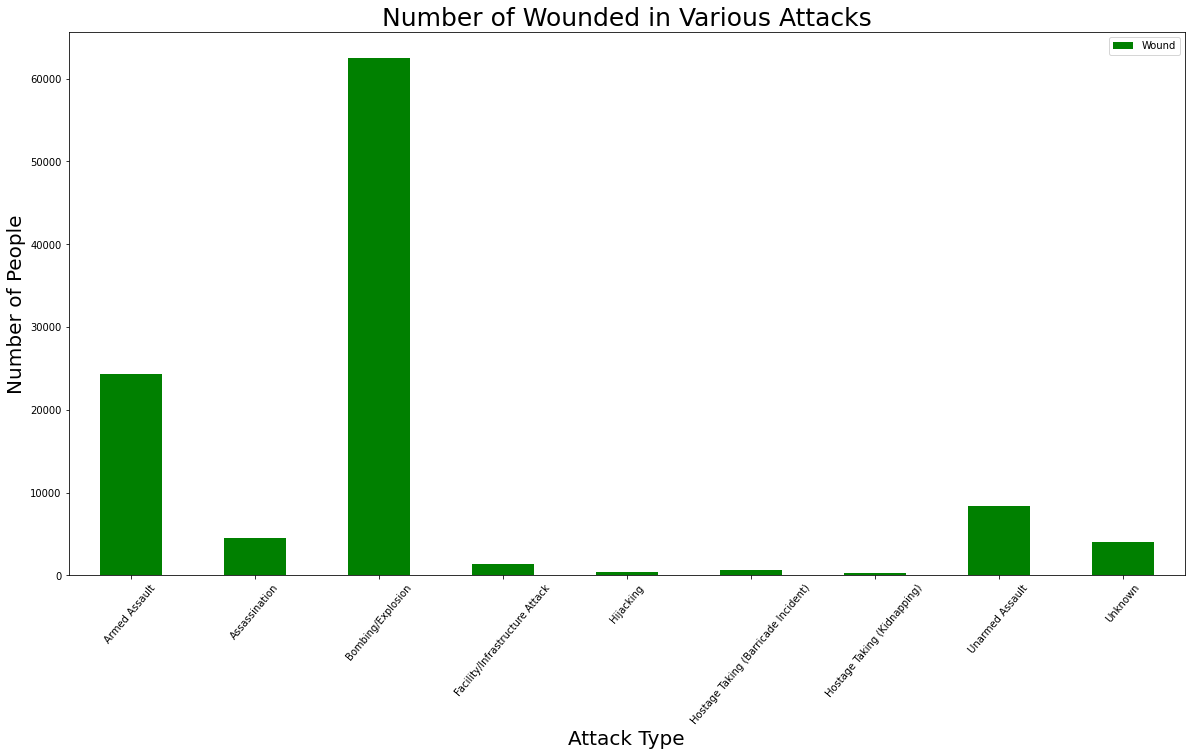

In [25]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['Green'])
plt.xticks(rotation=50)
plt.title("Number of Wounded in Various Attacks",fontsize=25)
plt.ylabel('Number of People',fontsize=20)
plt.xlabel('Attack Type',fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


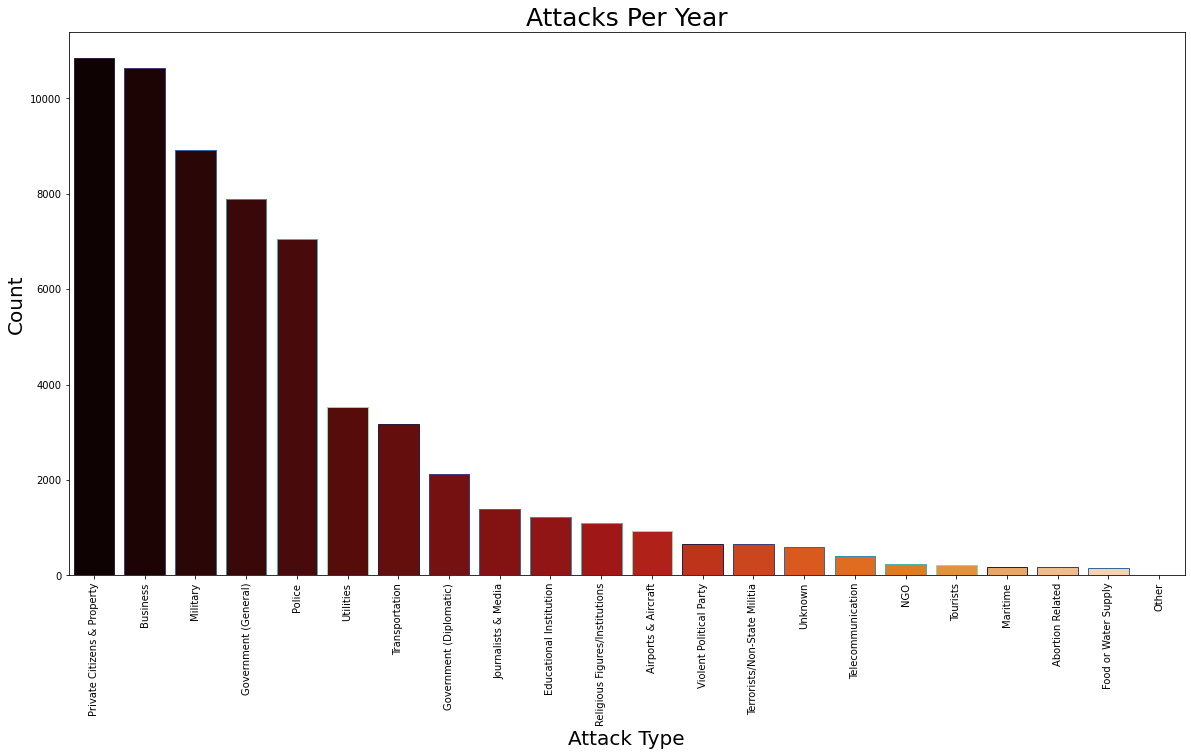

In [26]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attack Type",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Attacks Per Year",fontsize=25)
plt.show()

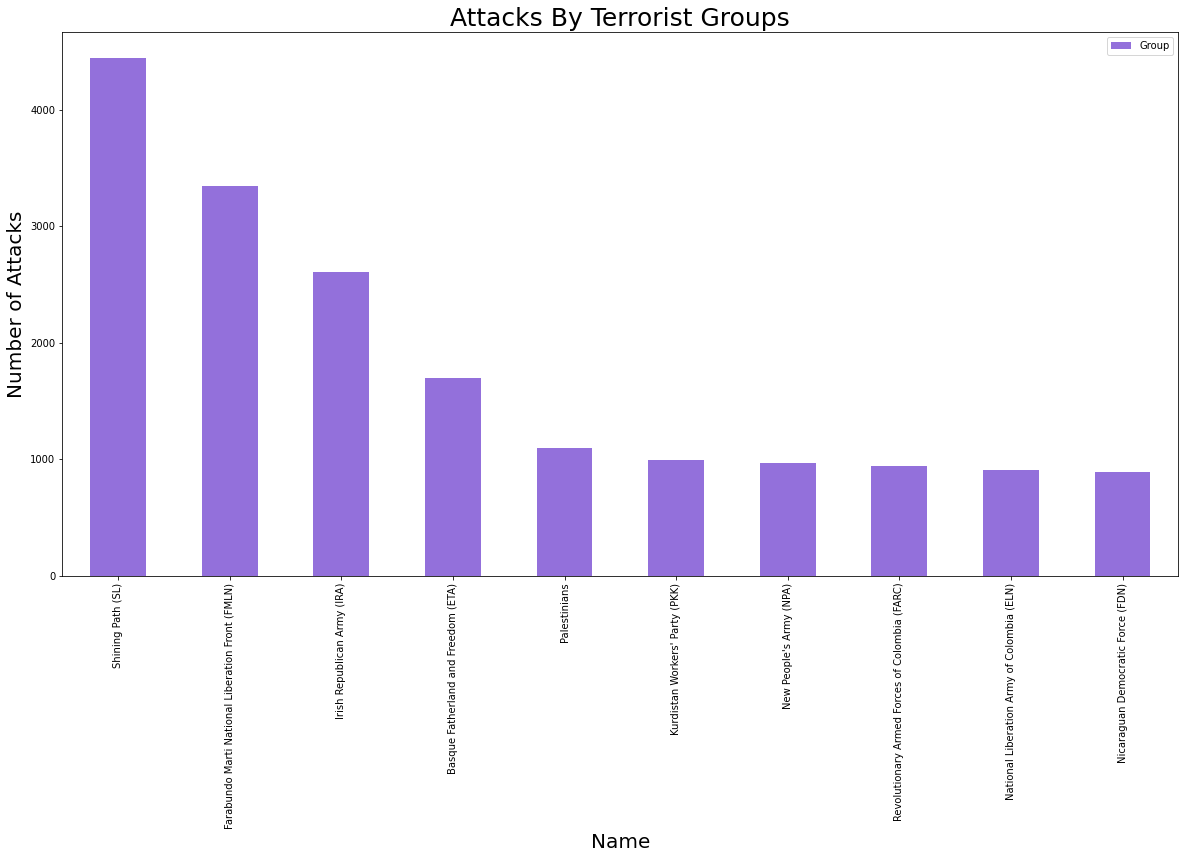

In [27]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='MediumPurple',figsize=(20,10))
plt.title("Attacks By Terrorist Groups",fontsize=25)
plt.xlabel("Name",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

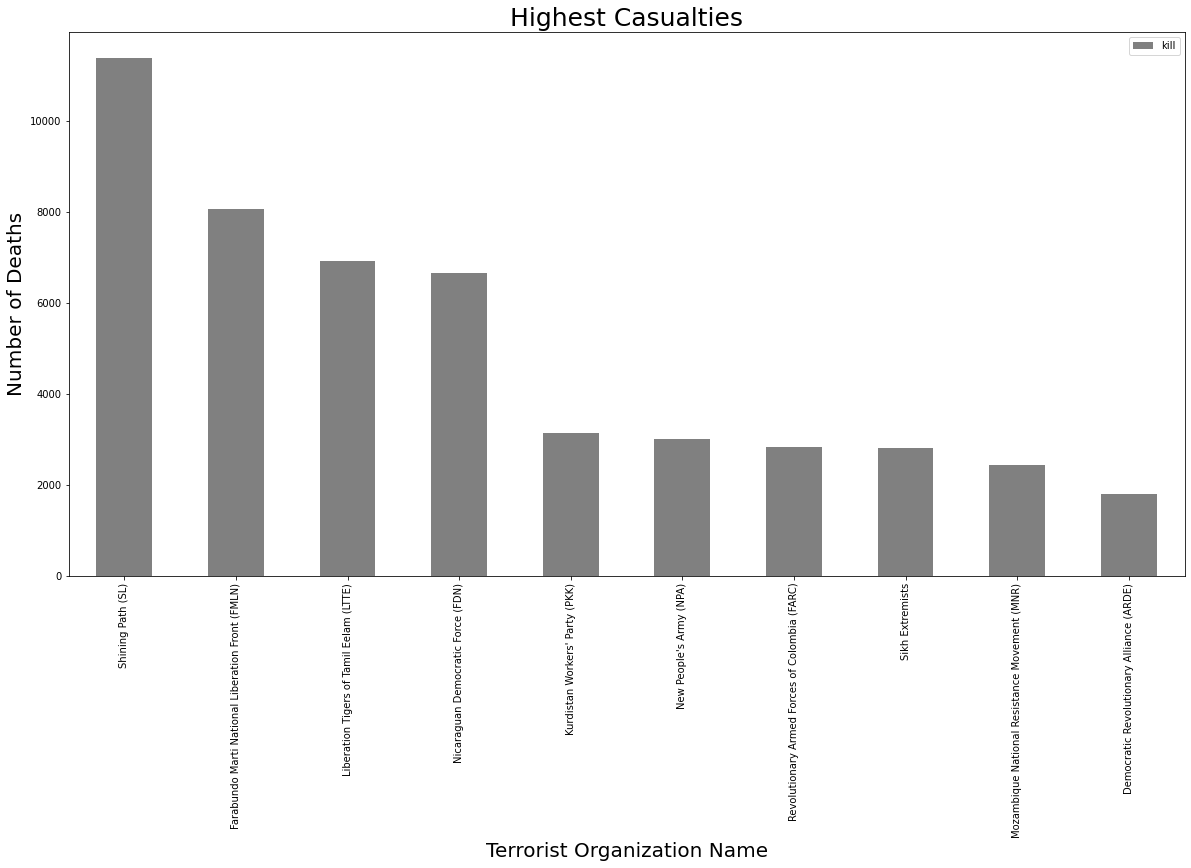

In [28]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='Gray',figsize=(20,10))
plt.title("Highest Casualties",fontsize=25)
plt.xlabel("Terrorist Organization Name",fontsize=20)
plt.ylabel("Number of Deaths",fontsize=20)
plt.show()

In [29]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Group,Country,kill
0,Shining Path (SL),Peru,11385.0
1,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
2,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,6884.0
3,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
4,Kurdistan Workers' Party (PKK),Turkey,3126.0
5,New People's Army (NPA),Philippines,3002.0
6,Revolutionary Armed Forces of Colombia (FARC),Colombia,2809.0
7,Sikh Extremists,India,2476.0
8,Mozambique National Resistance Movement (MNR),Mozambique,2357.0
9,Democratic Revolutionary Alliance (ARDE),Nicaragua,1803.0


In [30]:
kill = data.loc[:,'kill']
print('Number of People Killed in Terrorist Attacks:', int(sum(kill.dropna())))

Number of People Killed in Terrorist Attacks: 115898


In [31]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,65804.0,14876.0,24070.0,1388.0,460.0,840.0,1670.0,216.0,6574.0


In [32]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,347.0,7.0,1340.0,0.0,1328.0,0.0,486.0,19.0,11.0,27.0,...,0.0,0.0,536.0,97.0,1.0,42.0,17.0,88.0,69.0,136.0
